In [117]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [118]:
import uuid  # unique identifier / name the images
import os
import time

In [119]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp_epoch_200/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/park-yeonju/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-19 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [120]:
# img = os.path.join('emotionData', 'images', 'sad.jj.2.jpg')
img = 'https://images.chosun.com/resizer/qEXfh80FBArW7fdwNuzhDFyBfsQ=/616x0/smart/cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/Q3VK6ZMCUJSAULDQDFGVE5TJ4M.jpg'

In [121]:
results = model(img)

In [122]:
results.print()

image 1/1: 437x616 7 angrys, 2 sads, 3 surprises, 1 happy
Speed: 251.8ms pre-process, 100.4ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)


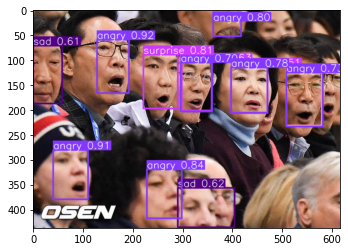

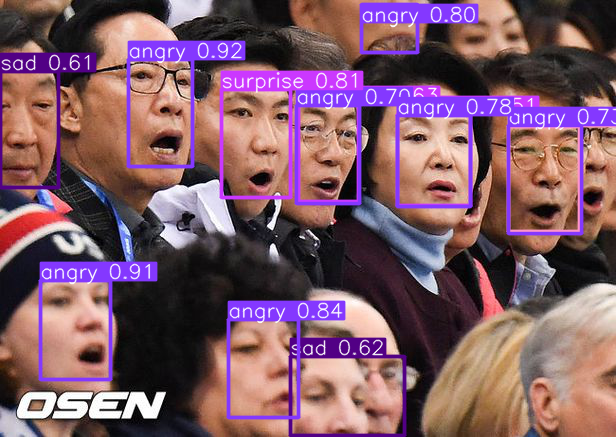

In [123]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

results.show()

In [124]:
# accessing our webcam and going to allow us to make detections in real time
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections
    results = model(frame)
    
    cv2.imshow('Emotion Detector', np.squeeze(results.render()))
    
    # 이 밑으로는 이쁘게 끝내는 코드
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()